In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def one_pass_bar_algorithm(time_series, date_list=None):
    bar_list = []
    maxima, minima = [], []
    direction = 1

    # add a very small point at the front of the time_series
    time_series = [time_series[0] - 1e-6] + time_series
    # add a very big point at the end of the time_series
    time_series = time_series + [time_series[-1] + 1e-6]

    for t in range(0, len(time_series)-1):
        if (time_series[t+1] - time_series[t]) * direction < 0:
            if direction == 1:
                if len(maxima) != 0 and time_series[t] > maxima[-1][1]:
                    output_bar(maxima.pop(), minima.pop(),date_list, bar_list)
                maxima.append((t, time_series[t])) 
            else:
                if len(minima) != 0 and time_series[t] < minima[-1][1]:
                    output_bar(maxima.pop(), minima.pop(),date_list, bar_list)
                minima.append((t, time_series[t]))
            direction = -direction
        else:
          if direction == 1 and len(maxima) != 0 and time_series[t] > maxima[-1][1]:
              output_bar(maxima.pop(), minima.pop(),date_list, bar_list)
          elif direction == -1 and len(minima) != 0 and time_series[t] < minima[-1][1]:
              output_bar(maxima.pop(), minima.pop(),date_list, bar_list)
    output_remaining_bars(maxima, minima, date_list, bar_list)
    return bar_list

def output_bar(max_value, min_value, date_list, bar_list):
    if date_list is None:
        print(f"(normal)Bar: ({max_value[0]}, {max_value[1]}) to ({min_value[0]}, {min_value[1]})")
        bar_list.append(((max_value[0], max_value[1]), (min_value[0], min_value[1])))

    else:
        print(f"(normal)Bar: ({date_list[max_value[0]-1]}, {max_value[1]}) to ({date_list[min_value[0]-1]}, {min_value[1]})")
        bar_list.append(((date_list[max_value[0]-1], max_value[1]), (date_list[min_value[0]-1], min_value[1])))

def output_remaining_bars(maxima, minima, date_list, bar_list):
    if date_list is None:
        for i in range(min(len(maxima), len(minima))):
            print(f"(remaining)Bar: ({maxima[i][0]}, {maxima[i][1]}) to ({minima[i][0]}, {minima[i][1]})")
            bar_list.append(((maxima[i][0], maxima[i][1]),  (minima[i][0], minima[i][1])))

    else:
        for i in range(min(len(maxima), len(minima))):
            print(f"(remaining)Bar: ({date_list[maxima[i][0]-1]}, {maxima[i][1]}) to ({date_list[minima[i][0]-1]}, {minima[i][1]})")
            bar_list.append(((date_list[maxima[i][0]-1], maxima[i][1]), (date_list[minima[i][0]-1], minima[i][1])))


In [3]:
# Load the data
data = pd.read_csv('/Users/eeevashen/Desktop/Apple_stock_data_6M.csv',low_memory=False)
# take out the Date column and Close/Last column
data = data[['Date','Close/Last']]
# make the whole dataframe upside down
data = data[::-1]
# seperate the Date column by month
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month

In [4]:
# print the first 5 rows of the data and the last 5 rows of the data
print(data.head())
print(data.tail())

          Date Close/Last  Month
124 2023-12-18    $195.89     12
123 2023-12-19    $196.94     12
122 2023-12-20    $194.83     12
121 2023-12-21    $194.68     12
120 2023-12-22    $193.60     12
        Date Close/Last  Month
4 2024-06-11    $207.15      6
3 2024-06-12    $213.07      6
2 2024-06-13    $214.24      6
1 2024-06-14    $212.49      6
0 2024-06-17    $216.67      6


In [5]:
data['Date'] = data['Date'].dt.strftime('%Y-%m-%d')
# make the Close/Last column as float
data['Close/Last'] = data['Close/Last'].str.replace('$','').astype(float)
# make the Date column and Close/Last column as a tuple
tuple_data = list(zip(data['Date'],data['Close/Last']))

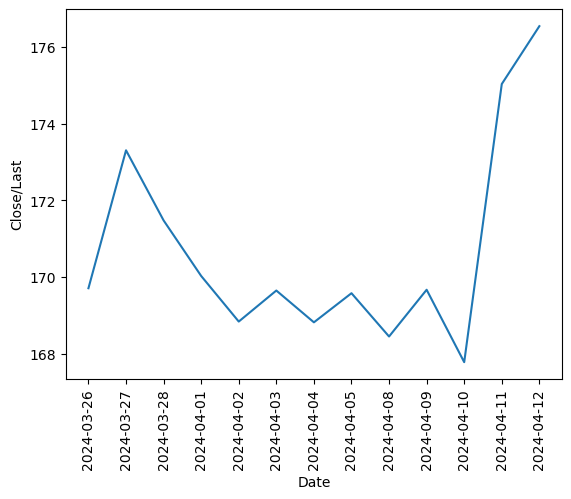

In [6]:
# pick data from march first to march 19th
data = data[(data['Date']>='2024-03-26') & (data['Date']<='2024-04-12')] 
# plot the data
plt.plot(data['Date'],data['Close/Last'])
plt.xlabel('Date')
plt.ylabel('Close/Last')
# make the x-axis label lilted
plt.xticks(rotation=90)
plt.show()

In [280]:
def updateValue(value, date, difference = 0.5):
    date2idx = {}
    for i in range(len(date)):
        date2idx[date[i]] = i
    maxima, minima = [], []
    if value[0] > value[1]:
        maxima.append((0, value[0]))
    for i in range(1, len(value)-1):
        if value[i] > value[i-1] and value[i] > value[i+1]:
            maxima.append((i, value[i]))
        elif value[i] < value[i-1] and value[i] < value[i+1]:
            minima.append((i, value[i]))
        else:
            continue
    updated_value = value.copy()
    print(maxima)
    print(minima)

    for i in range(len(minima)-1):
        left_maxima = maxima[i]
        right_maxima = maxima[i+1]
        if minima[i][1] + difference > left_maxima[1] or minima[i][1] + difference > right_maxima[1]:
            updated_value[minima[i][0]] = min(left_maxima[1], right_maxima[1])
        else:
            updated_value[minima[i][0]] = minima[i][1] + difference
    left_maxima = maxima[i]
    if minima[-1][1] + difference > left_maxima[1]:
        updated_value[minima[-1][0]] = left_maxima[1]
    else:
        updated_value[minima[-1][0]] += difference
    return updated_value


[(1, 173.31), (5, 169.65), (7, 169.58), (9, 169.67)]
[(4, 168.84), (6, 168.82), (8, 168.45), (10, 167.78)]


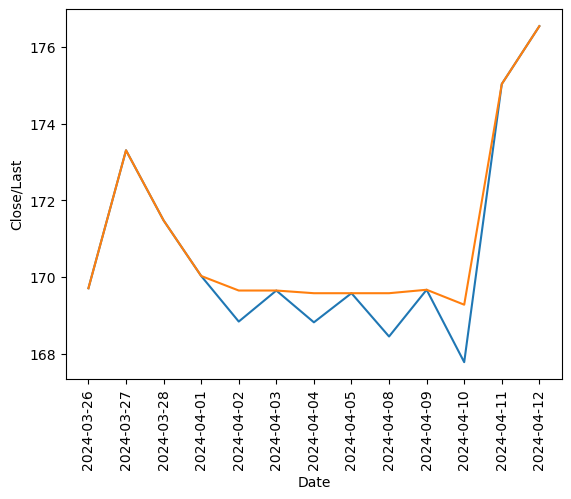

In [281]:

value = data['Close/Last'].tolist()
date = data['Date'].tolist()
updated_value = updateValue(value, date, difference= 1.5)

# plot the data
plt.plot(date,value)
plt.plot(date,updated_value)
plt.xlabel('Date')
plt.ylabel('Close/Last')
# make the x-axis label lilted
plt.xticks(rotation=90)
plt.show()

In [8]:
data = data[(data['Date']>='2024-03-01') & (data['Date']<='2024-03-19')] 
value = data['Close/Last'].tolist()
date = data['Date'].tolist()

In [9]:
one_pass_bar_algorithm(value, date)

IndexError: list index out of range

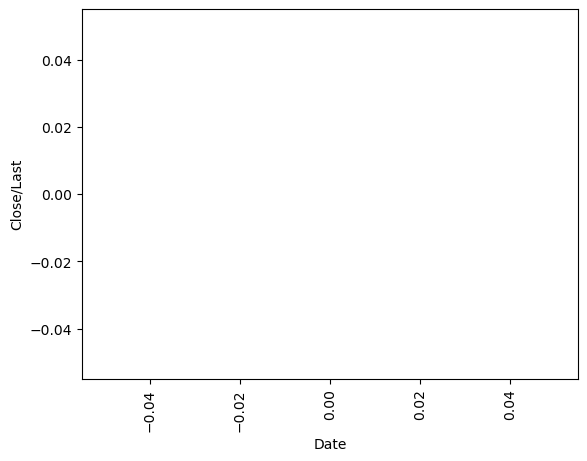

In [282]:
# pick data from march first to march 19th
data = data[(data['Date']>='2024-03-01') & (data['Date']<='2024-03-19')] 
# plot the data
plt.plot(data['Date'],data['Close/Last'])
plt.xlabel('Date')
plt.ylabel('Close/Last')
# make the x-axis label lilted
plt.xticks(rotation=90)
plt.show()

[(0, 179.66), (7, 173.23), (9, 173.0)]
[(4, 169.0), (8, 171.13), (10, 172.62)]


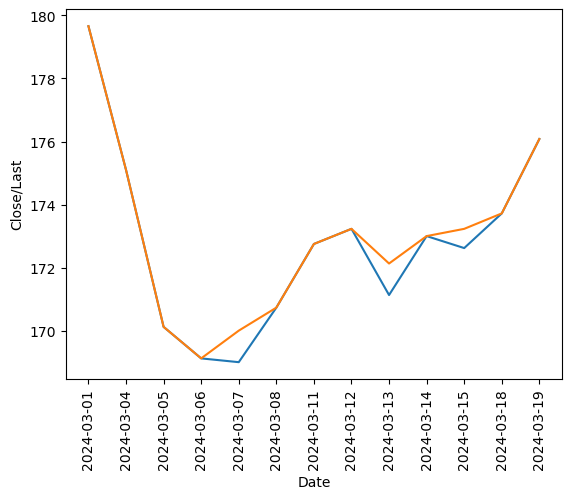

In [246]:
value = data['Close/Last'].tolist()
date = data['Date'].tolist()
updated_value = updateValue(value, date, difference= 1)

# plot the data
plt.plot(date,value)
plt.plot(date,updated_value)
plt.xlabel('Date')
plt.ylabel('Close/Last')
# make the x-axis label lilted
plt.xticks(rotation=90)
plt.show()

In [190]:
bar_list = one_pass_bar_algorithm(data['Close/Last'].tolist(), data['Date'].tolist())
print(bar_list)

(normal)Bar: (2024-04-03, 169.65) to (2024-04-02, 168.84)
(normal)Bar: (2024-04-05, 169.58) to (2024-04-04, 168.82)
(normal)Bar: (2024-04-09, 169.67) to (2024-04-08, 168.45)
(normal)Bar: (2024-03-27, 173.31) to (2024-04-10, 167.78)
[(('2024-04-03', 169.65), ('2024-04-02', 168.84)), (('2024-04-05', 169.58), ('2024-04-04', 168.82)), (('2024-04-09', 169.67), ('2024-04-08', 168.45)), (('2024-03-27', 173.31), ('2024-04-10', 167.78))]


In [191]:
print(data['Date'].tolist())
date2idx = {}
for i in range(len(data['Date'].tolist())):
    date2idx[data['Date'].tolist()[i]] = i
print(date2idx)

['2024-03-26', '2024-03-27', '2024-03-28', '2024-04-01', '2024-04-02', '2024-04-03', '2024-04-04', '2024-04-05', '2024-04-08', '2024-04-09', '2024-04-10', '2024-04-11', '2024-04-12']
{'2024-03-26': 0, '2024-03-27': 1, '2024-03-28': 2, '2024-04-01': 3, '2024-04-02': 4, '2024-04-03': 5, '2024-04-04': 6, '2024-04-05': 7, '2024-04-08': 8, '2024-04-09': 9, '2024-04-10': 10, '2024-04-11': 11, '2024-04-12': 12}


In [192]:
print(bar_list)
candidate_list = []
temp_val = []
for i in range(len(bar_list)):
    if bar_list[i][0][0] < bar_list[i][1][0]:
        from_idx = date2idx[bar_list[i][0][0]]
        from_val = bar_list[i][0][1]
        temp_val.append(from_val)
        candidate = []
        for idx in range(from_idx+1, len(data['Date'].tolist())):
            if from_val > data['Close/Last'].tolist()[idx]:
                candidate.append(idx)
            else:
                break
    # else TODO
    candidate_list.append(candidate)
print(candidate_list)
print(temp_val)


[(('2024-04-03', 169.65), ('2024-04-02', 168.84)), (('2024-04-05', 169.58), ('2024-04-04', 168.82)), (('2024-04-09', 169.67), ('2024-04-08', 168.45)), (('2024-03-27', 173.31), ('2024-04-10', 167.78))]
[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], [2, 3, 4, 5, 6, 7, 8, 9, 10]]
[173.31]


In [ ]:
# sort BarList TODO

2 10
2 8
1 9
4 10
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 11
2 12
[179.66, 175.1, 170.12, 169.12, 169.0, 170.73, 172.75, 173.23, 171.13, 173.0, 172.62, 173.72, 176.08]
[179.66, 175.4, 170.42000000000002, 169.42000000000002, 169.3, 171.03, 173.05, 173.53, 171.43, 173.23, 173.22000000000003, 174.02, 176.38000000000002]


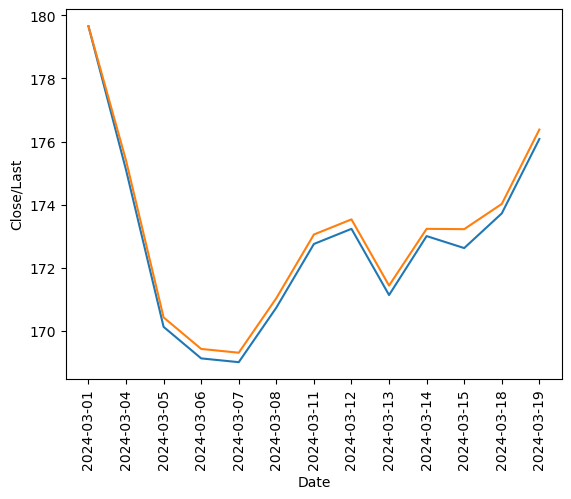

In [173]:
# Assume candidate_list, temp_val, BarList all sorted in the order of short bar to long bar
date = data['Date'].tolist()
original_value = data['Close/Last'].tolist()
updated_value = original_value.copy()
has_reached_level = [False] * len(original_value)
has_updated = [False] * len(original_value)
difference = 0.3
# scan each bar
for i in range(len(candidate_list)):
    candidate = candidate_list[i]
    for j in range(len(candidate)):
        if not has_updated[candidate[j]]:
            if updated_value[candidate[j]] + difference > temp_val[i]:
                updated_value[candidate[j]] = temp_val[i]
                print("1", candidate[j])
                has_reached_level[i] = True
            else:
                updated_value[candidate[j]] += difference
                print("2", candidate[j])
            has_updated[candidate[j]] = True
        elif has_updated[candidate[j]] and has_reached_level[i]:
            if updated_value[candidate[j]] + difference > temp_val[i]:
                updated_value[candidate[j]] = temp_val[i]
                print("3", candidate[j])
            else:
                updated_value[candidate[j]] += difference
                print("4", candidate[j])
                has_reached_level[i] = False
        else:
            continue

print(original_value)
print(updated_value)

plt.plot(date,original_value)
plt.plot(date,updated_value)
plt.xlabel('Date')
plt.ylabel('Close/Last')
# make the x-axis label lilted
plt.xticks(rotation=90)
plt.show()

In [175]:
for i in range(len(date)):
    print(f"{date[i]}: {original_value[i]-updated_value[i]}")

2024-03-01: 0.0
2024-03-04: -0.30000000000001137
2024-03-05: -0.30000000000001137
2024-03-06: -0.30000000000001137
2024-03-07: -0.30000000000001137
2024-03-08: -0.30000000000001137
2024-03-11: -0.30000000000001137
2024-03-12: -0.30000000000001137
2024-03-13: -0.30000000000001137
2024-03-14: -0.22999999999998977
2024-03-15: -0.6000000000000227
2024-03-18: -0.30000000000001137
2024-03-19: -0.30000000000001137


[179.66, 175.1, 170.12, 169.12, 169.0, 170.73, 172.75, 173.23, 171.13, 173.0, 172.62, 173.72, 176.08]
[179.66, 175.5, 170.52, 169.52, 169.4, 171.13, 173.15, 173.63, 171.53, 173.4, 173.02, 174.12, 176.48000000000002]


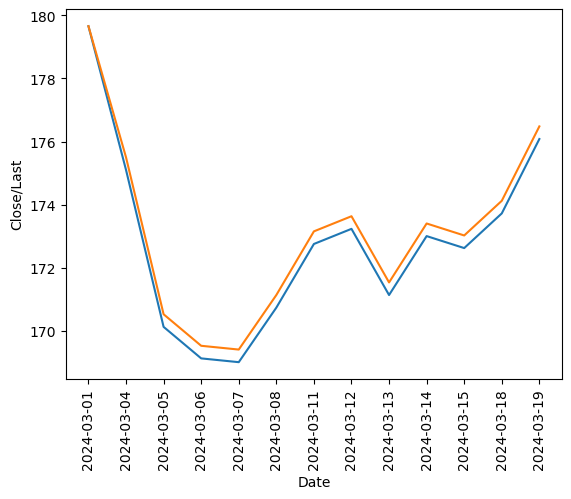

In [165]:
# # Assume candidate_list, temp_val, BarList all sorted in the order of short bar to long bar
# date = data['Date'].tolist()
# original_value = data['Close/Last'].tolist()
# updated_value = original_value.copy()
# has_updated = [False] * len(original_value)
# remain_updated = [0] * len(original_value)
# difference = 0.4
# # scan each bar
# for i in range(len(candidate_list)):
#     candidate = candidate_list[i]
#     for j in range(len(candidate)):
#         if not has_updated[candidate[j]]:
#             if updated_value[candidate[j]] + remain_updated[candidate[j]] > temp_val[i]:
#                 updated_value[candidate[j]] = temp_val[i]
#                 remain_updated[candidate[j]] -=  (temp_val[i] - updated_value[candidate[j]])
#             else:
#                 updated_value[candidate[j]] += difference
#             has_updated[candidate[j]] = True
#         else:
#             if updated_value[candidate[j]] + remain_updated[candidate[j]] > temp_val[i]:
#                 updated_value[candidate[j]] = temp_val[i]
#                 remain_updated[candidate[j]] -= (temp_val[i] - updated_value[candidate[j]])
#             else:
#                 updated_value[candidate[j]] += remain_updated[candidate[j]]
#                 remain_updated[candidate[j]] = 0
# print(original_value)
# print(updated_value)

# plt.plot(date,original_value)
# plt.plot(date,updated_value)
# plt.xlabel('Date')
# plt.ylabel('Close/Last')
# # make the x-axis label lilted
# plt.xticks(rotation=90)
# plt.show()

In [128]:

bar_list.append((('2024-02-29', -1000000.0),('2024-03-20', 1000000.0)))

In [193]:
# define a function that return the direction of the bar
def bar_direction(bar_list):
    display = []
    for bar in bar_list:
        if bar[0][0] < bar[1][0]:
            display.append('left')
            print('left')
        else:
            display.append('right')
            print('right')
    return display 

In [194]:
display_list = bar_direction(bar_list)

right
right
right
left


In [195]:
# define a function that use the bar_list to get a sorted local_max list and a sorted local_min list
def local_max_min(bar_list):
    local_max = []
    local_min = []
    for bar in bar_list:
        local_max.append(bar[0][0])
        local_min.append(bar[1][0])
    local_max = sorted(local_max, key=lambda x: x)
    local_min = sorted(local_min, key=lambda x: x)
    return local_max, local_min

In [196]:
local_max, local_min = local_max_min(bar_list)
print(local_max)
print(local_min)

['2024-03-27', '2024-04-03', '2024-04-05', '2024-04-09']
['2024-04-02', '2024-04-04', '2024-04-08', '2024-04-10']


In [133]:
# make all data to a list as a tuple of Date and Close/Last for each date
data = list(zip(data['Date'],data['Close/Last']))
print(data)

[('2024-03-01', 179.66), ('2024-03-04', 175.1), ('2024-03-05', 170.12), ('2024-03-06', 169.12), ('2024-03-07', 169.0), ('2024-03-08', 170.73), ('2024-03-11', 172.75), ('2024-03-12', 173.23), ('2024-03-13', 171.13), ('2024-03-14', 173.0), ('2024-03-15', 172.62), ('2024-03-18', 173.72), ('2024-03-19', 176.08)]


In [134]:
#define a function that find all the dates of data that need to be moved
#data need to be moved for each bar, the points between the local_max and the next local_max for the left bar, the points between the local_min and the precious local_min for the right bar
#and they should below the bar's corresponding local_max value 
def data_to_move(local_max, local_min, bar, display, data):
    data_to_move = []
    for i in range(len(data)):
        if display == 'left':
            # bar is a string of date, give me the index of the date in the local_max list
            index = local_max.index(bar[0][0])
            if data[i][0] > local_max[index] and data[i][0] < local_max[index+1]:
                if data[i][1] < bar[0][1]:
                    data_to_move.append(data[i])
        elif display == 'right':
            index = local_max.index(bar[0][0])
            if data[i][0] > local_min[index] and data[i][0] < local_min[index-1]:
                if data[i][1] < bar[0][1]:
                    data_to_move.append(data[i])
    return data_to_move

In [135]:
bar = bar_list[0]
display = display_list[0]
data_to_move1 = data_to_move(local_max, local_min, bar, display, data)
print(data_to_move1)

IndexError: list index out of range